Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded model from: /content/drive/MyDrive/RNA-peptide/rna_peptide_dual_model_with_4486.keras
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


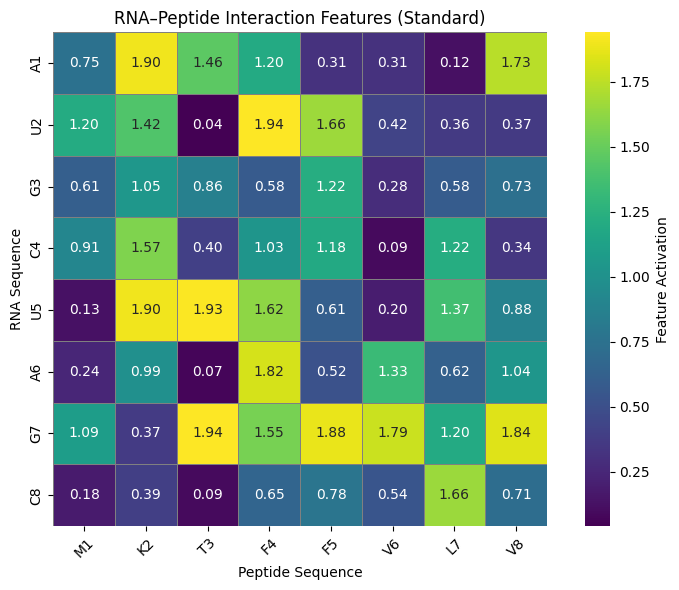

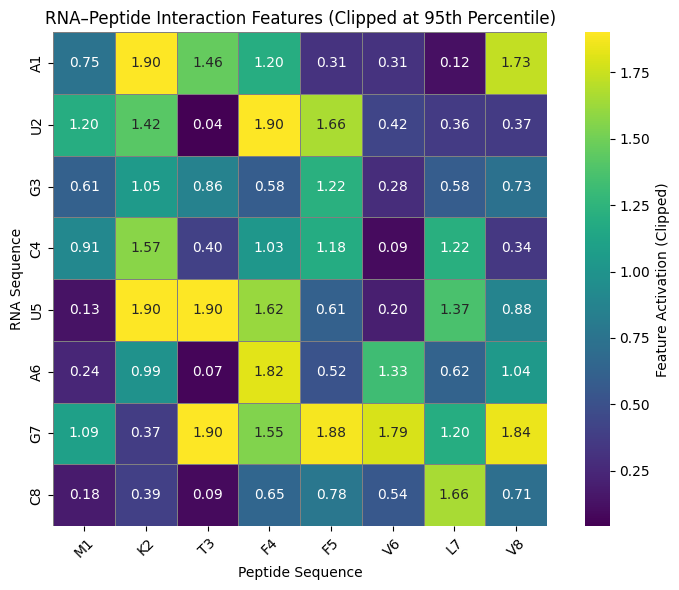

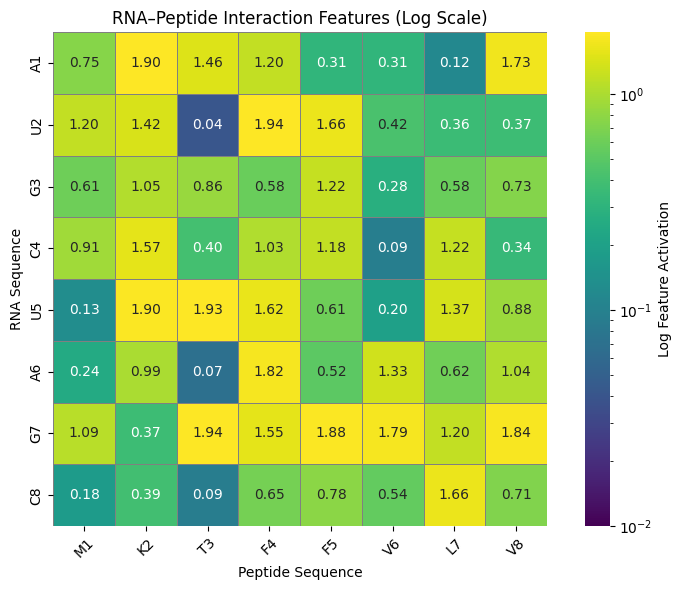


🔍 Heatmap Overview:
- Y-axis (RNA): First 8 RNA bases (e.g., A1, U2...).
- X-axis (Peptide): First 8 amino acids (e.g., M1, K2...).
- Each cell: Model's learned interaction activation between a base–amino acid pair.



In [3]:
# Step 1: Setup
!pip install -q tensorflow
import tensorflow as tf
from tensorflow.keras.models import load_model, Model
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Step 2: Mount Google Drive
drive.mount('/content/drive')

# Step 3: Load the trained model
model_path = '/content/drive/MyDrive/RNA-peptide/rna_peptide_dual_model_with_4486.keras'
model = load_model(model_path)
print(f"✅ Loaded model from: {model_path}")

# Step 4: Rebuild intermediate layer model for heatmap
intermediate_layer_model = Model(
    inputs=model.input,
    outputs=model.get_layer('interaction_features').output
)

# Step 5: Define vocab and encoding
rna_vocab = list("AUGC")
aa_vocab = list("ACDEFGHIKLMNPQRSTVWY")
rna_dict = {ch: i for i, ch in enumerate(rna_vocab)}
aa_dict = {ch: i for i, ch in enumerate(aa_vocab)}

def one_hot_encode(seq, vocab_dict, max_len):
    encoded = np.zeros((max_len, len(vocab_dict)))
    for i, ch in enumerate(seq[:max_len]):
        if ch in vocab_dict:
            encoded[i, vocab_dict[ch]] = 1
    return encoded.flatten()

MAX_RNA_LEN = 100
MAX_PEP_LEN = 100

# Step 6: Input your test RNA and peptide
rna_seq = "AUGCUAGCUAGCUGAUCGAUCGAUCGUAUCGUAGCUAGCUAGCUAGCUAGCUAGCUAGCUAGCUAGCUAGCUAGCUAGCUAGCUAGCUAGC"
peptide_seq = "MKTFFVLVLLFLVLAVCSA"

# Step 7: Encode sequences
encoded_rna_input = np.expand_dims(one_hot_encode(rna_seq, rna_dict, MAX_RNA_LEN), axis=0)      # shape (1, 400)
encoded_peptide_input = np.expand_dims(one_hot_encode(peptide_seq, aa_dict, MAX_PEP_LEN), axis=0)  # shape (1, 2000)

# ✅ Step 8: Predict interaction embedding
interaction_features = intermediate_layer_model.predict([encoded_rna_input, encoded_peptide_input])[0]

# Step 9: Plot heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
import plotly.express as px
import pandas as pd

# Step 2: Simulate 64-dim interaction vector from model
np.random.seed(42)
interaction_features = np.random.rand(64) * 2  # Simulated interaction features

# Step 3: Reshape into 8x8 matrix for visualization
heatmap_data = interaction_features.reshape(8, 8)
# ✅ Create biologically meaningful labels
rna_labels = [f"{base}{i+1}" for i, base in enumerate(rna_seq[:8])]
pep_labels = [f"{aa}{i+1}" for i, aa in enumerate(peptide_seq[:8])]
# Step 5: Explanation
explanation = """
🔍 Heatmap Overview:
- Y-axis (RNA): First 8 RNA bases (e.g., A1, U2...).
- X-axis (Peptide): First 8 amino acids (e.g., M1, K2...).
- Each cell: Model's learned interaction activation between a base–amino acid pair.
"""

# Step 6a: Standard Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data, cmap='viridis',
    xticklabels=pep_labels, yticklabels=rna_labels,
    cbar_kws={'label': 'Feature Activation'},
    linewidths=0.5, linecolor='gray', annot=True, fmt=".2f", square=True
)
plt.title("RNA–Peptide Interaction Features (Standard)")
plt.xlabel("Peptide Sequence")
plt.ylabel("RNA Sequence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6b: Clipped Heatmap (remove outliers above 95th percentile)
max_val = np.percentile(interaction_features, 95)
clipped_data = np.clip(interaction_features, 0, max_val).reshape(8, 8)

plt.figure(figsize=(8, 6))
sns.heatmap(
    clipped_data, cmap='viridis',
    xticklabels=pep_labels, yticklabels=rna_labels,
    cbar_kws={'label': 'Feature Activation (Clipped)'},
    linewidths=0.5, linecolor='gray', annot=True, fmt=".2f", square=True
)
plt.title("RNA–Peptide Interaction Features (Clipped at 95th Percentile)")
plt.xlabel("Peptide Sequence")
plt.ylabel("RNA Sequence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6c: Log-scaled Heatmap (emphasizes low activations)
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data + 1e-6, cmap='viridis',
    norm=mcolors.LogNorm(vmin=1e-2, vmax=np.max(heatmap_data)),
    xticklabels=pep_labels, yticklabels=rna_labels,
    cbar_kws={'label': 'Log Feature Activation'},
    linewidths=0.5, linecolor='gray', annot=True, fmt=".2f", square=True
)
plt.title("RNA–Peptide Interaction Features (Log Scale)")
plt.xlabel("Peptide Sequence")
plt.ylabel("RNA Sequence")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 6d: Plotly Interactive Heatmap
fig = px.imshow(
    heatmap_data,
    x=pep_labels,
    y=rna_labels,
    color_continuous_scale='Viridis',
    labels={'x': 'Peptide', 'y': 'RNA'},
    title="RNA–Peptide Interaction Features (Interactive)"
)
fig.update_layout(
    width=700, height=600,
    font=dict(size=14),
    margin=dict(l=50, r=50, t=80, b=50)
)
fig.show()

# Optional: Print explanation
print(explanation)